### 回归是如何变成分类的呢？

之前在线性回归问题中，得到了具体的回归值，如果此时任务要做一个二分类该怎么办呢？

如果可以将连续的数值转换成对应的区间，这样就可以完成分类任务了，逻辑回归中借助sigmoid函数完成了数值映射，通过概率值比较来完成分类任务

In [73]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

### 神奇的sigmoid函数：

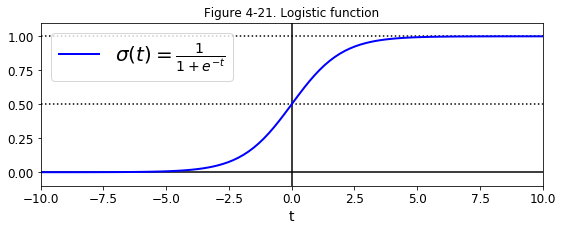

In [74]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.title('Figure 4-21. Logistic function')
plt.show()

### 推导公式：
![title](./img/1.png)

### 鸢尾花数据集：
![title](./img/2.png)

### 加载sklearn内置数据集

In [75]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [76]:
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

对于传统逻辑回归，要对标签多变换，也就是属于当前类别为1，其他类别为0

In [77]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

In [78]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [79]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression()
log_res.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [80]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_res.predict_proba(X_new)

In [81]:
y_proba

array([[0.98554411, 0.01445589],
       [0.98543168, 0.01456832],
       [0.98531838, 0.01468162],
       ...,
       [0.02618938, 0.97381062],
       [0.02598963, 0.97401037],
       [0.02579136, 0.97420864]])

随着输入特征数值的变化，结果概率值也会随之变化

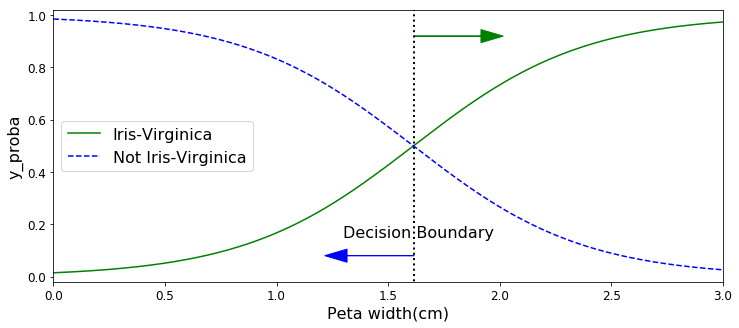

In [101]:
plt.figure(figsize=(12,5))
decision_boundary = X_new[y_proba[:,1]>=0.5][0]
plt.plot([decision_boundary,decision_boundary],[-1,2],'k:',linewidth = 2)
plt.plot(X_new,y_proba[:,1],'g-',label = 'Iris-Virginica')
plt.plot(X_new,y_proba[:,0],'b--',label = 'Not Iris-Virginica')
plt.arrow(decision_boundary,0.08,-0.3,0,head_width = 0.05,head_length=0.1,fc='b',ec='b')
plt.arrow(decision_boundary,0.92,0.3,0,head_width = 0.05,head_length=0.1,fc='g',ec='g')
plt.text(decision_boundary+0.02,0.15,'Decision Boundary',fontsize = 16,color = 'k',ha='center')
plt.xlabel('Peta width(cm)',fontsize = 16)
plt.ylabel('y_proba',fontsize = 16)
plt.axis([0,3,-0.02,1.02])
plt.legend(loc = 'center left',fontsize = 16)

In [86]:
print (help(plt.arrow))

Help on function arrow in module matplotlib.pyplot:

arrow(x, y, dx, dy, **kwargs)
    Add an arrow to the axes.
    
    This draws an arrow from ``(x, y)`` to ``(x+dx, y+dy)``.
    
    Parameters
    ----------
    x, y : float
        The x/y-coordinate of the arrow base.
    dx, dy : float
        The length of the arrow along x/y-direction.
    
    Returns
    -------
    arrow : `.FancyArrow`
        The created `.FancyArrow` object.
    
    Other Parameters
    ----------------
    **kwargs
        Optional kwargs (inherited from `.FancyArrow` patch) control the
        arrow construction and properties:
    
    Constructor arguments
      *width*: float (default: 0.001)
        width of full arrow tail
    
      *length_includes_head*: bool (default: False)
        True if head is to be counted in calculating the length.
    
      *head_width*: float or None (default: 3*width)
        total width of the full arrow head
    
      *head_length*: float or None (default: 1.5

In [102]:
X = iris['data'][:,(2,3)]
y = (iris['target']==2).astype(np.int)

In [164]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression(C = 10000)
log_res.fit(X,y)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [165]:
X[:,0].min(),X[:,0].max()

(1.0, 6.9)

In [166]:
X[:,1].min(),X[:,1].max()

(0.1, 2.5)

### 决策边界的绘制：
- 构建坐标数据，合理的范围当中，根据实际训练时输入数据来决定
- 整合坐标点，得到所有测试输入数据坐标点
- 预测，得到所有点的概率值
- 绘制等高线，完成决策边界

构建坐标数据：

In [167]:
x0,x1 = np.meshgrid(np.linspace(1,2,2).reshape(-1,1),np.linspace(10,20,3).reshape(-1,1))

In [168]:
x0

array([[1., 2.],
       [1., 2.],
       [1., 2.]])

In [169]:
x1

array([[10., 10.],
       [15., 15.],
       [20., 20.]])

In [170]:
np.c_[x0.ravel(),x1.ravel()]

array([[ 1., 10.],
       [ 2., 10.],
       [ 1., 15.],
       [ 2., 15.],
       [ 1., 20.],
       [ 2., 20.]])

In [171]:
x0,x1 = np.meshgrid(np.linspace(2.9,7,500).reshape(-1,1),np.linspace(0.8,2.7,200).reshape(-1,1))


In [172]:
X_new = np.c_[x0.ravel(),x1.ravel()]
X_new

array([[2.9       , 0.8       ],
       [2.90821643, 0.8       ],
       [2.91643287, 0.8       ],
       ...,
       [6.98356713, 2.7       ],
       [6.99178357, 2.7       ],
       [7.        , 2.7       ]])

In [173]:
X_new.shape

(100000, 2)

In [174]:
y_proba = log_res.predict_proba(X_new)

In [175]:
x0.shape

(200, 500)

In [176]:
x1.shape

(200, 500)

Text(6.5, 2.3, 'Vir')

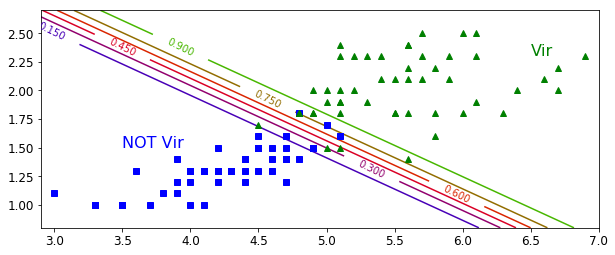

In [183]:
plt.figure(figsize=(10,4))
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'g^')

zz = y_proba[:,1].reshape(x0.shape)
contour = plt.contour(x0,x1,zz,cmap=plt.cm.brg)
plt.clabel(contour,inline = 1)
plt.axis([2.9,7,0.8,2.7])
plt.text(3.5,1.5,'NOT Vir',fontsize = 16,color = 'b')
plt.text(6.5,2.3,'Vir',fontsize = 16,color = 'g')

### 如何进行多类别分类呢？Softmax该登场了

![title](./img/3.png)

In [184]:
X = iris['data'][:,(2,3)]
y = iris['target']

In [185]:
softmax_reg = LogisticRegression(multi_class = 'multinomial',solver='lbfgs')
softmax_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [186]:
softmax_reg.predict([[5,2]])

array([2])

In [187]:
softmax_reg.predict_proba([[5,2]])

array([[2.43559894e-04, 2.14859516e-01, 7.84896924e-01]])

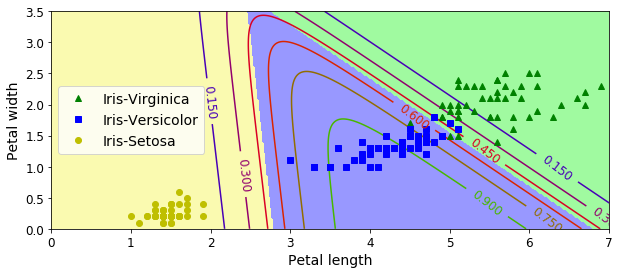

In [189]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()